# 5. Supplementary Figure 2

This notebook is used to create the panels of Supplementary Figure 2.

Before starting, use 1.Preprocessing notebook to generate:
- SC1_normalized.h5ad - Normalized single-cell data
- SC1_filtered.h5ad - Filtered non-normalized single-cell data

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scanpy as sc
from anndata import read_h5ad

import sys
sys.path.insert(0, '../functions/')
import utils

### Set plot style

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats=['retina']
sns.set(rc={'figure.figsize':(5, 5),
            'legend.frameon':False},
        style='ticks',
        context='talk')

# Render figures with higher resolution.
plt.rcParams['figure.dpi']=200
# Save with transparent regions white background.
plt.rcParams['savefig.facecolor']='white'

### Set color palette

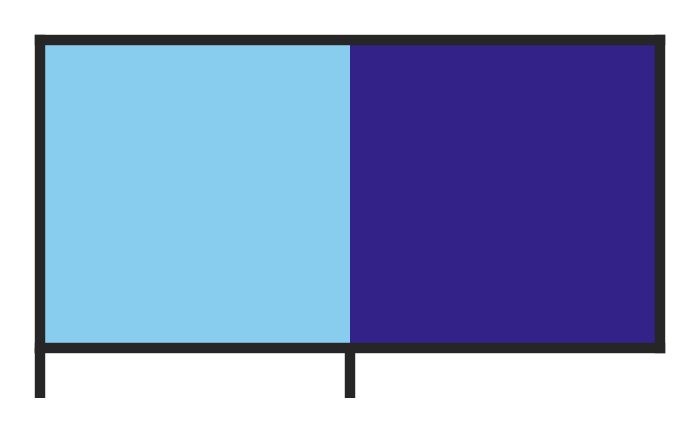

In [3]:
#color palette
palette = [(136,204,238),(51,34,136)]
palette = [(e[0]/255.0, e[1]/255.0, e[2]/255.0) for e in palette]
cmap = ListedColormap(palette)
sns.color_palette(palette=None,as_cmap=True)
sns.palplot(palette)

## Panel A

### Set paths

In [4]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC1_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_2'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [5]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [6]:
#select a column from adata that contains replicate and cell line information
refcol = 'slide_condition_rep'

#compute mean ion intensity for every replicate
mean_intra = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=False)

#calculate pearson correlation among all replicates within each cell line
corr = utils.calculate_correlation(mean_intra)

#filter for correlation among replicates from the same slide
corr_s1 = corr.loc[(corr['slide_col1']=='Slide1') & (corr['slide_col2']=='Slide1')]
corr_s2 = corr.loc[(corr['slide_col1']=='Slide2') & (corr['slide_col2']=='Slide2')]
corr_s3 = corr.loc[(corr['slide_col1']=='Slide3') & (corr['slide_col2']=='Slide3')]

corr_same_slide = pd.concat(objs=[corr_s1, corr_s2, corr_s3], join='outer', axis=0)

### Histogram and boxplot

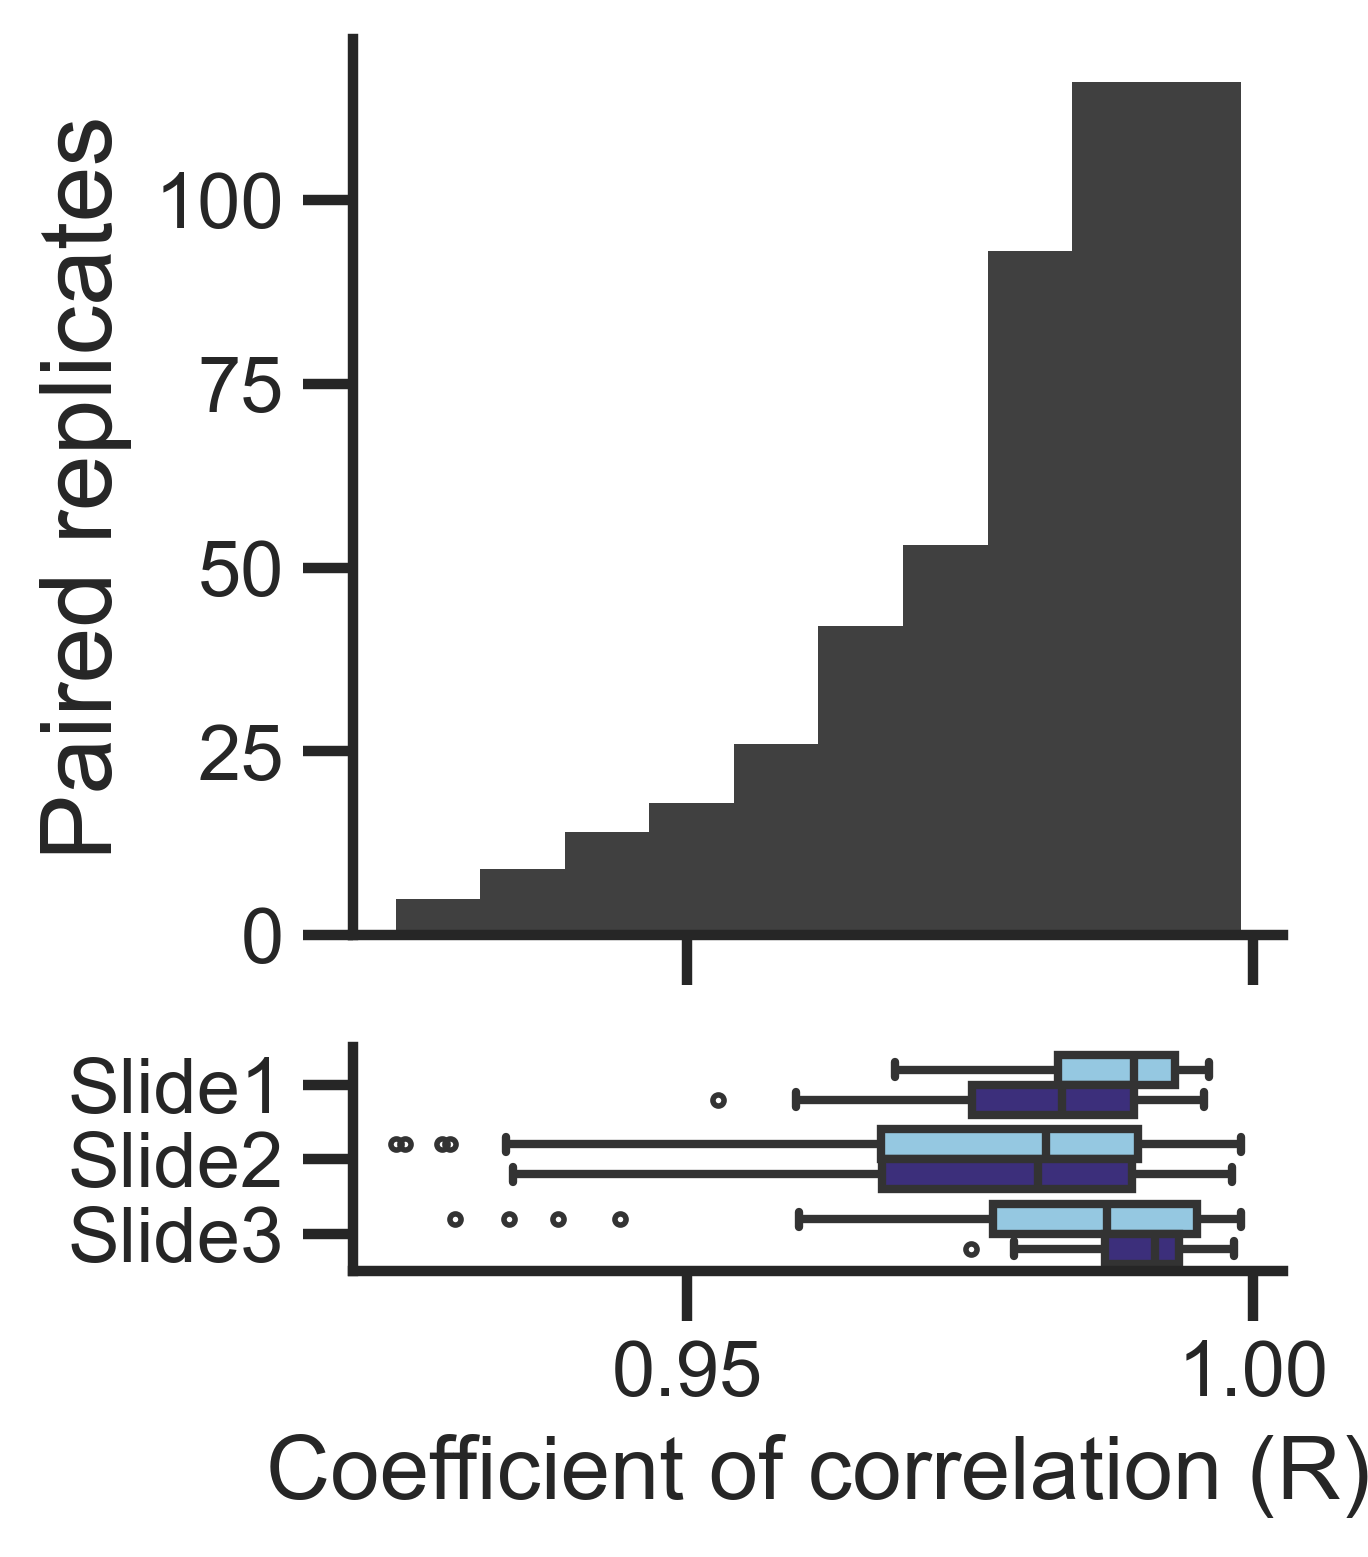

In [7]:
f = plt.figure(figsize=(3, 4))
gs = f.add_gridspec(2, 1, height_ratios=(4,1)) # Defining a gridspec where the subplots are places
ax_down = f.add_subplot(gs[1, 0]) # The margin plots are sharing an axis with the main plot
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down) # The histogram

sns.histplot(data=corr_same_slide, 
            x='R', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=True,
            ax=ax_main)

sns.boxplot(data=corr_same_slide, 
            x='R', 
            y='slide_col1', 
            fliersize=2,
            linewidth=1.5,
            legend=False,
            palette=palette,
            hue='condition',
            orient='h',
            ax=ax_down)

ax_main.tick_params('both', labelsize=14)
ax_down.tick_params('both', labelsize=14)
ax_main.set_ylabel("Paired replicates", fontsize=18)
ax_main.set_xlabel('')
ax_down.set_ylabel('')
ax_down.set_xlabel(u'Coefficient of correlation (R)', fontsize=16)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_A.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_A.svg', bbox_inches='tight')

## Panel B

### Set paths

In [8]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC1_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_2'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [9]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [10]:
#select a column from adata that contains replicate and cell line information
refcol = 'slide_condition_rep'

#compute mean ion intensity for every replicate
mean_intra = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=False)
mean_intra

#calculate pearson correlation among all replicates within each cell line
corr = utils.calculate_correlation(mean_intra)

### Histograms and boxplots
#### Overall slope

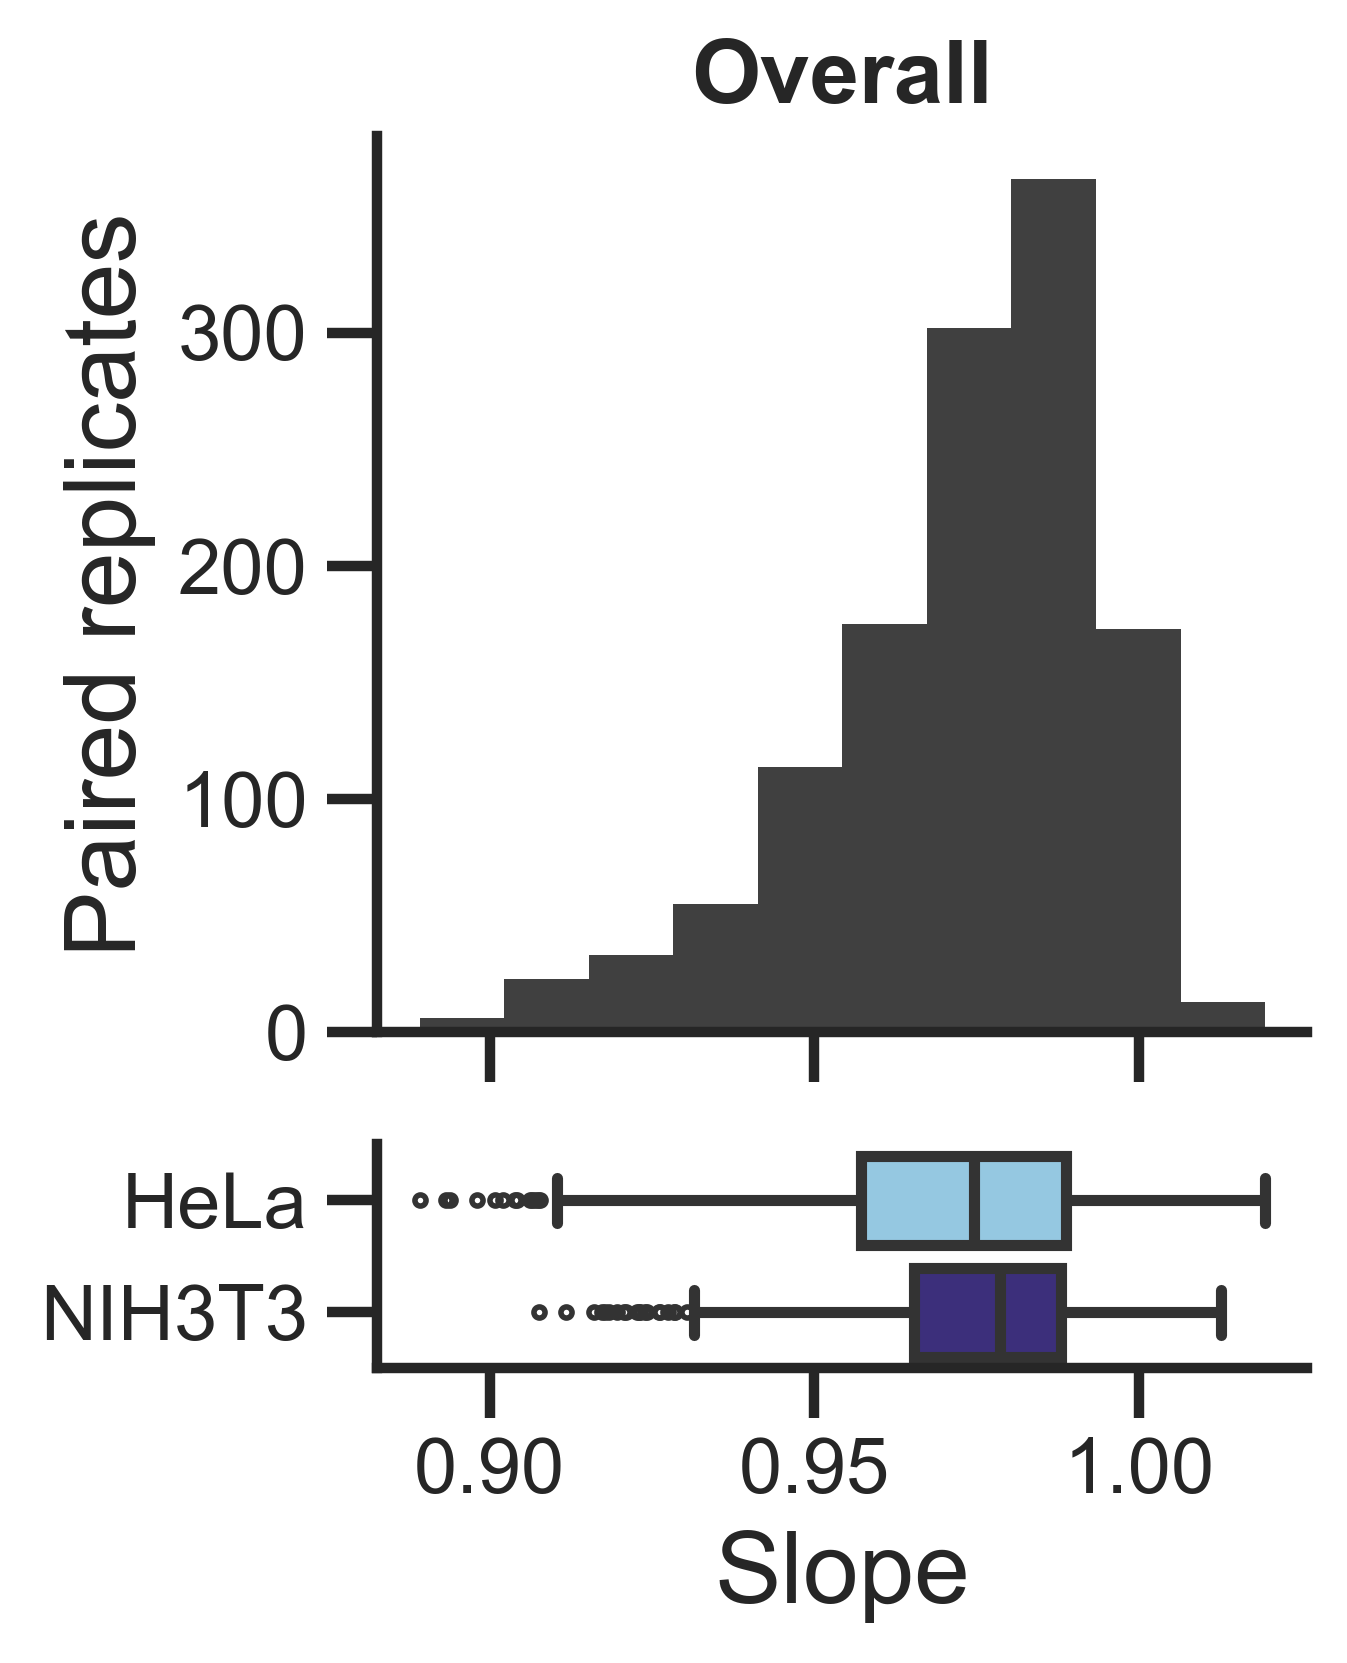

In [11]:
f = plt.figure(figsize=(3, 4))
gs = f.add_gridspec(2, 1, height_ratios=(4,1)) # Defining a gridspec where the subplots are places
ax_down = f.add_subplot(gs[1, 0]) # The margin plots are sharing an axis with the main plot
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down) # Histogram

sns.histplot(data=corr, 
            x='slope', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=False,
            ax=ax_main)

sns.boxplot(data=corr, 
            x='slope', 
            y='condition', 
            palette=palette,
            hue='condition',
            fliersize=2,
            linewidth=2,
            legend=False,
            orient='h',
            ax=ax_down)

ax_main.tick_params('both',labelsize=14)
ax_down.tick_params('both',labelsize=14)
ax_main.set_ylabel("Paired replicates", fontsize=18)
ax_main.set_xlabel("")
ax_down.set_ylabel("")
ax_down.set_xlabel(u'Slope', fontsize=18)
ax_main.set_title('Overall', fontsize=16, weight='bold', y=1)
plt.setp(ax_main.get_xticklabels(minor=False), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_B_overall.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B_overall.svg', bbox_inches='tight')

#### Slope - replicates from different slides

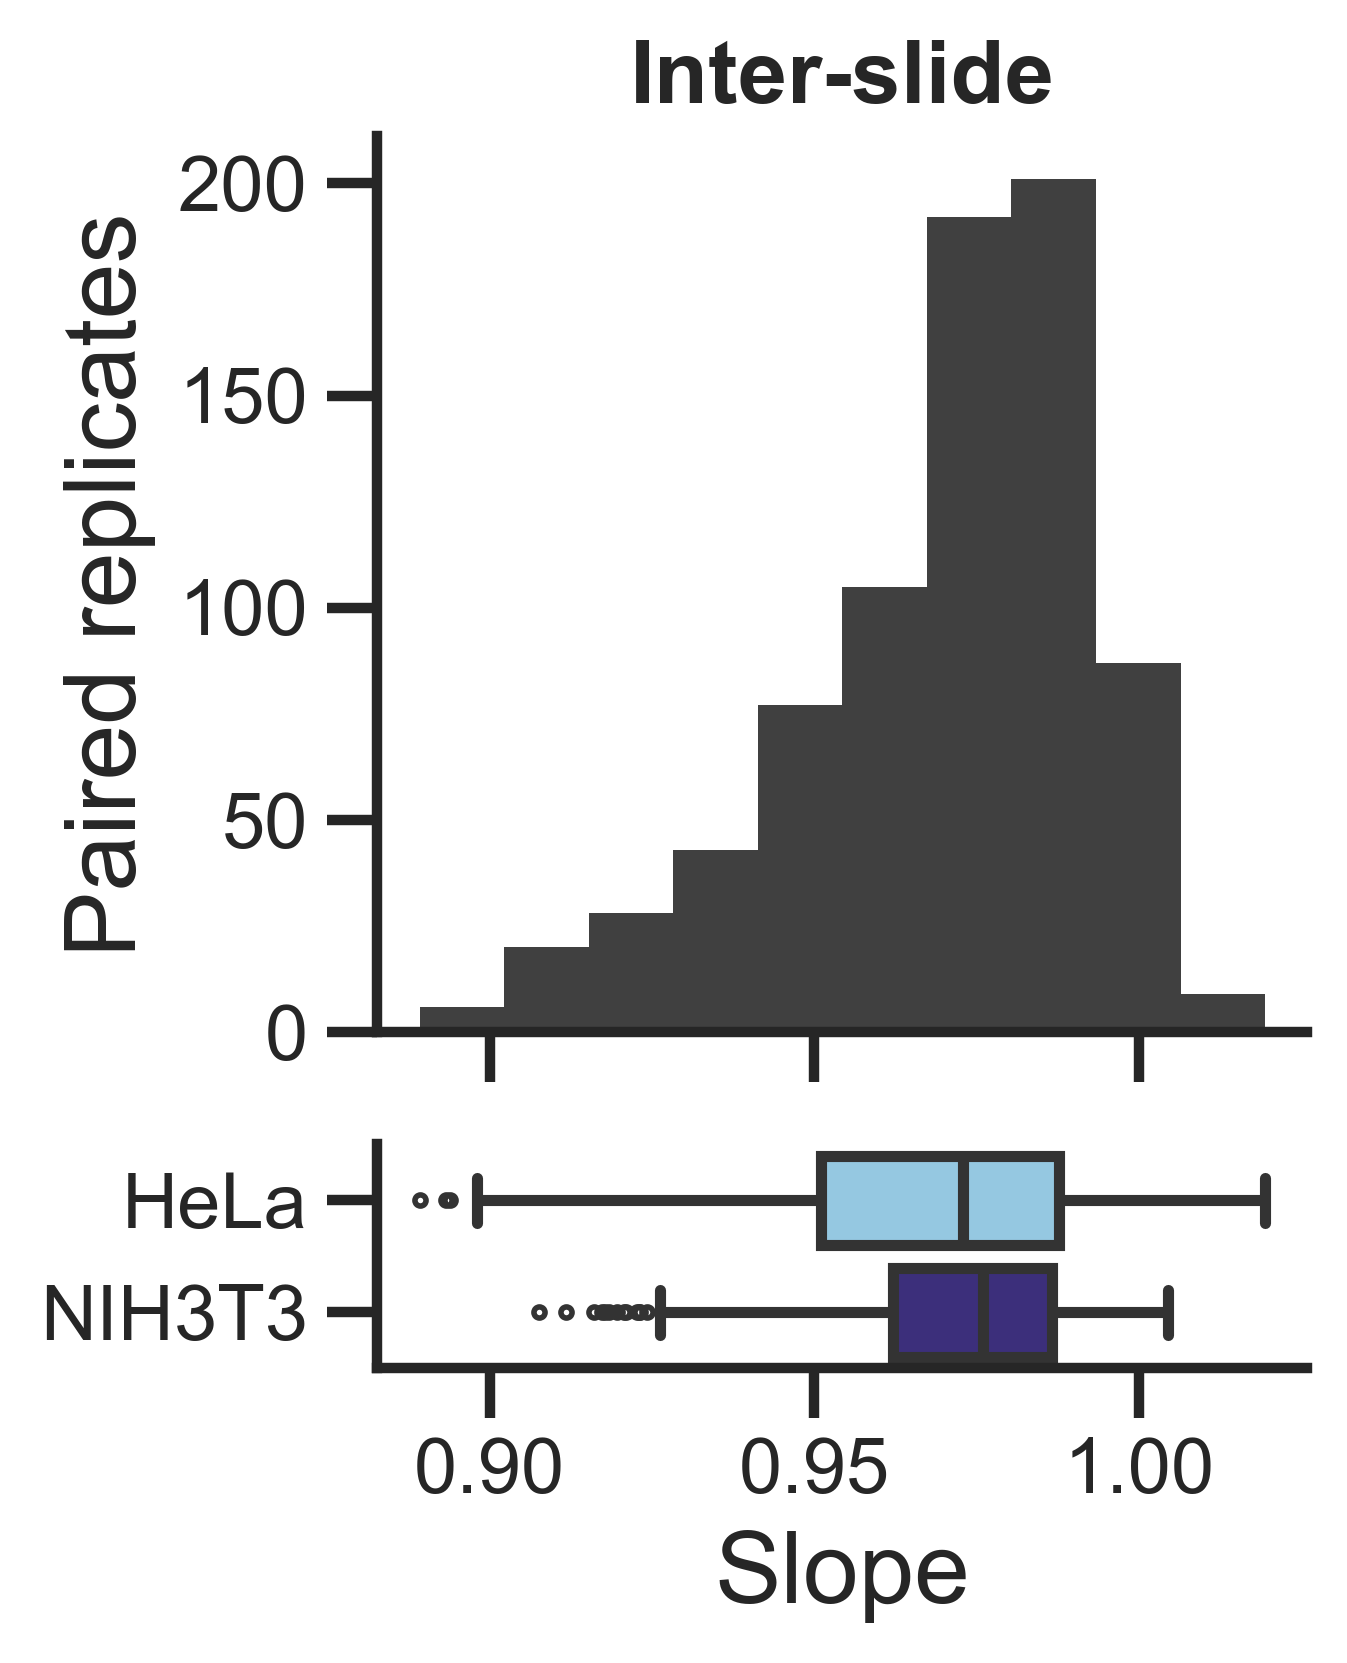

In [12]:
#filter for correlation among replicates from different slide
#Between replicates from slide 1 x 2,3
corr_1 = corr.loc[(corr['slide_col1']=='Slide1') & 
                   (corr['slide_col2']!='Slide1')]
#Between replicates from slide 2 x 3 
corr_2 = corr.loc[(corr['slide_col1']=='Slide2') & 
                   (corr['slide_col2']!='Slide2')]
corr_diff_slide = pd.concat(objs=[corr_1, corr_2], join='outer', axis=0)

f = plt.figure(figsize=(3, 4))
gs = f.add_gridspec(2, 1, height_ratios=(4,1)) # Defining a gridspec where the subplots are places
ax_down = f.add_subplot(gs[1, 0]) # The margin plots are sharing an axis with the main plot
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down) # The histogram

sns.histplot(data=corr_diff_slide, 
            x='slope', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=False,
            ax=ax_main)

sns.boxplot(data=corr_diff_slide, 
            x='slope', 
            y='condition', 
            fliersize=2,
            linewidth=2,
            legend=False,
            palette=palette,
            hue='condition',
            orient='h',
            ax=ax_down)

ax_main.tick_params('both', labelsize=14)
ax_down.tick_params('both', labelsize=14)
ax_main.set_ylabel("Paired replicates", fontsize=18)
ax_main.set_xlabel("")
ax_down.set_ylabel("")
ax_down.set_xlabel(u'Slope', fontsize=18)
ax_main.set_title('Inter-slide', fontsize=16, weight='bold', y=1)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_B_diff_slide.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B_diff_slide.svg', bbox_inches='tight')

#### Slope - replicates from same slide

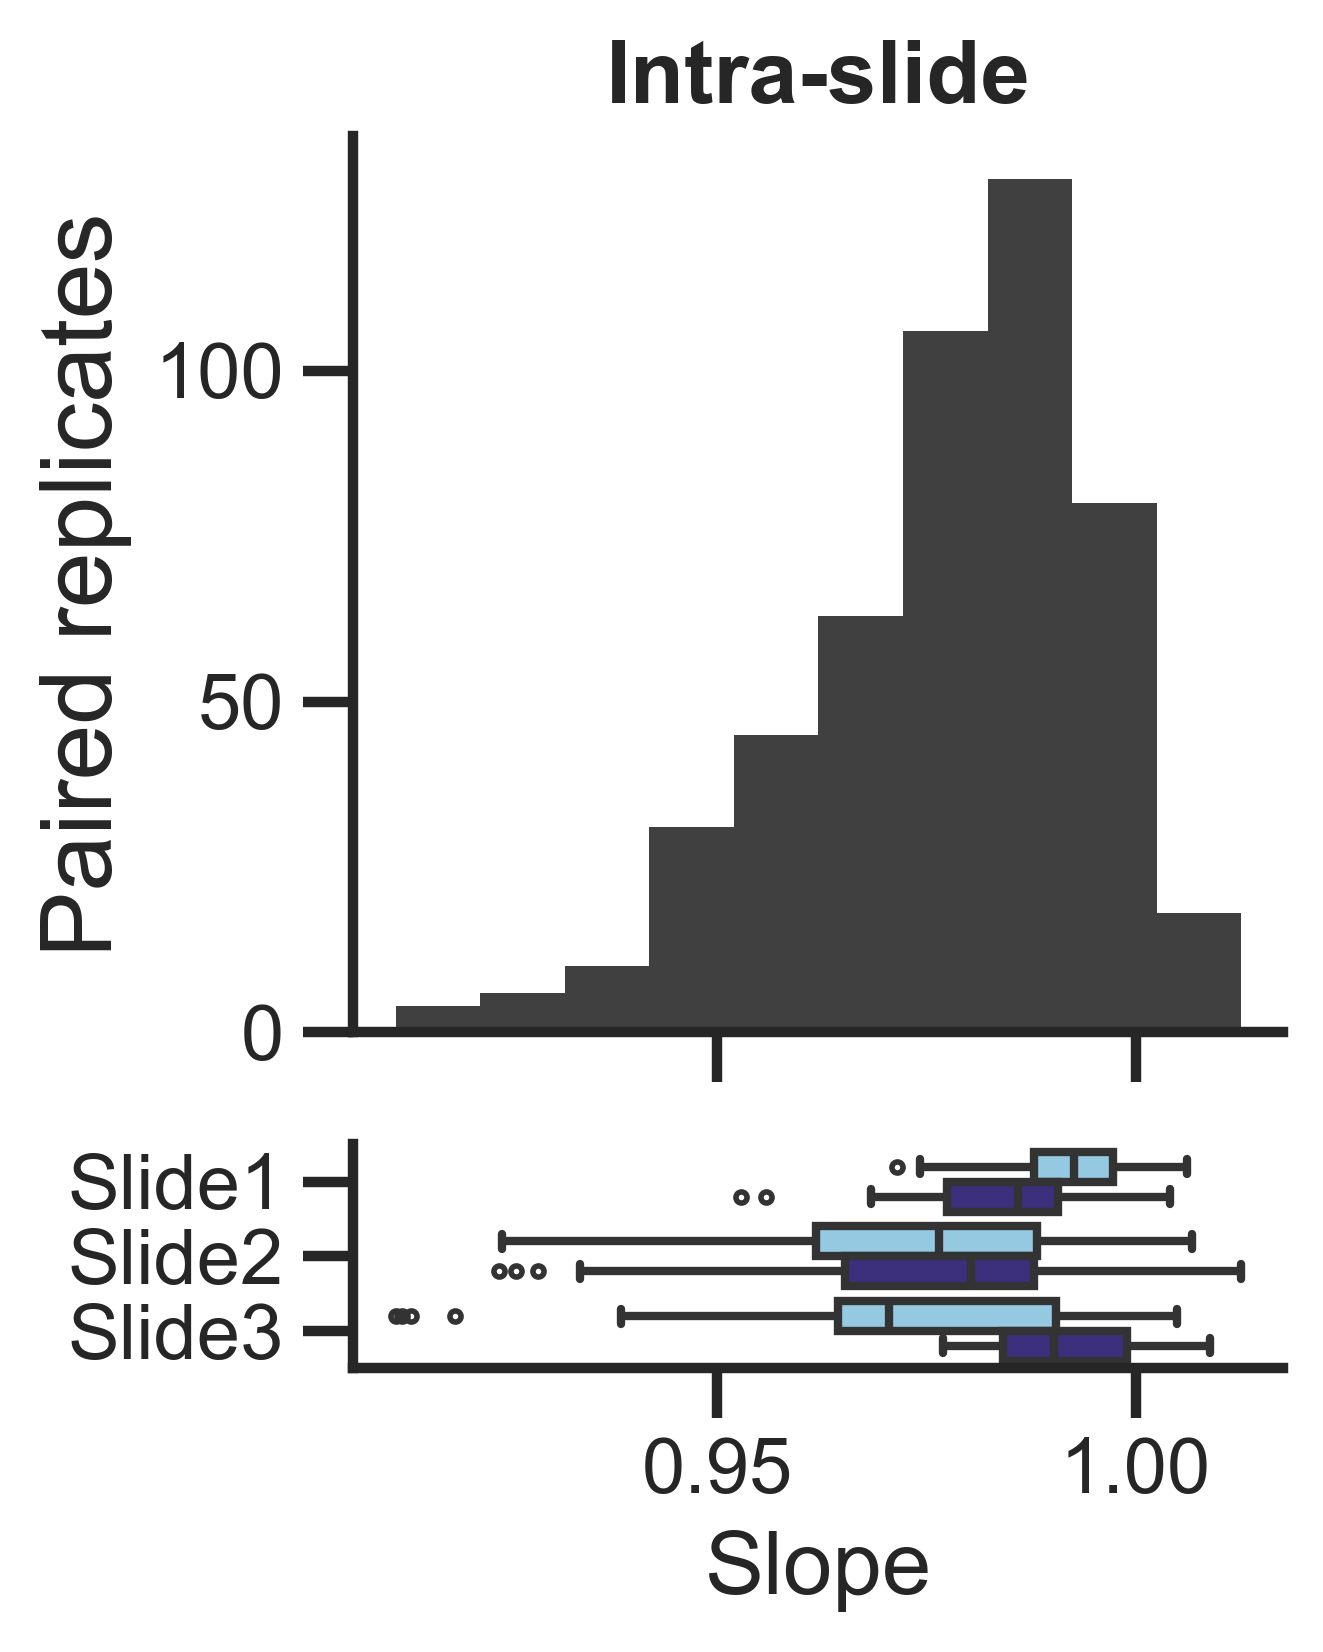

In [13]:
#filter for correlation among replicates from the same slide
corr_s1 = corr.loc[(corr['slide_col1']=='Slide1') & (corr['slide_col2']=='Slide1')]
corr_s2 = corr.loc[(corr['slide_col1']=='Slide2') & (corr['slide_col2']=='Slide2')]
corr_s3 = corr.loc[(corr['slide_col1']=='Slide3') & (corr['slide_col2']=='Slide3')]
corr_same_slide = pd.concat(objs=[corr_s1, corr_s2, corr_s3], join='outer', axis=0)

f = plt.figure(figsize=(3, 4))
gs = f.add_gridspec(2, 1, height_ratios=(4,1)) # Defining a gridspec where the subplots are places
ax_down = f.add_subplot(gs[1, 0]) # The margin plots are sharing an axis with the main plot
ax_main = f.add_subplot(gs[0, 0], sharex=ax_down) # The histogram

sns.histplot(data=corr_same_slide, 
            x='slope', 
            bins=10, 
            linewidth=0, 
            color='Black',
            legend=False,
            ax=ax_main)

sns.boxplot(data=corr_same_slide, 
            x='slope', 
            y='slide_col1', 
            fliersize=2,
            linewidth=1.5,
            legend=False,
            palette=palette,
            hue='condition',
            orient='h',
            ax=ax_down)

ax_main.tick_params('both', labelsize=14)
ax_down.tick_params('both', labelsize=14)
ax_main.set_ylabel('Paired replicates', fontsize=18)
ax_main.set_xlabel('')
ax_down.set_ylabel('')
ax_down.set_xlabel(u'Slope', fontsize=16)
ax_main.set_title('Intra-slide', fontsize=16, weight='bold', y=1)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_down.get_xticklabels(minor=True), visible=True)
sns.despine(offset=0, trim=False, ax=ax_down)
sns.despine(trim=False, ax=ax_main)

plt.savefig(plots_path / 'panel_B_same_slide.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B_same_slide.svg', bbox_inches='tight')

## Panel C

### Set paths

In [14]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC1_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_2'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [15]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

#filter for Slide2
adata = adata[adata.obs.slide.eq('Slide2'),:]

In [16]:
#select a column from adata that contains replicate and cell line information
refcol = 'slide_condition_well'

#compute mean ion intensity for every replicate
mean_intra = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=False)
mean_well = mean_intra.transpose()

#calculate pearson correlation among replicates
corr = mean_well.corr(method='pearson')

### Clustermap

In [17]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr, 
                    cmap='mako_r',
                    figsize=[len(corr) * 0.5 + 2, len(corr) * 0.5 + 2],
                    annot_kws={'size':8},
                    cbar_kws={'aspect':10, 
                              'shrink':0.5, 
                              'orientation':'horizontal', 
                              'ticks':(0.85, 0.9, 0.95, 1.00)})
cax=ax.figure.axes[-1]
pax=ax.figure.axes[0]
pax.tick_params(width=0.5, length=2,labelsize=10)
cax.tick_params(width=0.5, length=4,labelsize=10)
cax.set_title('Pearson Coefficient\n of Correlation (R)', size=20, weight='bold')
ax.ax_heatmap.set_ylabel(None)
ax.ax_heatmap.set_xlabel(None)
ax.ax_col_dendrogram.remove()
plt.xticks(fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()

plt.savefig(plots_path / 'panel_C.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_C.svg', bbox_inches='tight')

<Figure size 2000x2000 with 0 Axes>

## Panel D

### Set path

In [18]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC1_filtered.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_2'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [19]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [20]:
#select a column from adata that contains replicate and cell line information
refcol = 'slide_condition_rep'

#compute mean of intensities for every replicate with non-normalized values
mean = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=True, mean=True, quantile=None)
#compute Coefficient of Variation for each ion across replicates
key = ['condition','ion']
CV_mean = utils.calculate_CV(mean_replicate=mean, key=key, column=refcol)

#compute ion intensity for the 50% quantile (median) for every replicate with non-normalized values
median = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=True, mean=False, quantile=50)
#compute Coefficient of Variation for each ion across replicates
key = ['condition','ion']
CV_median = utils.calculate_CV(mean_replicate=median, key=key, column=refcol)

#compute ion intensity for the 90% quantile for every replicate with non-normalized values
q90 = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=True, mean=False, quantile=90)
#compute Coefficient of Variation for each ion across replicates
key = ['condition','ion']
CV_90 = utils.calculate_CV(mean_replicate=q90, key=key, column=refcol)

### Scatterplots
#### Mean ion intensity - non-normalized 

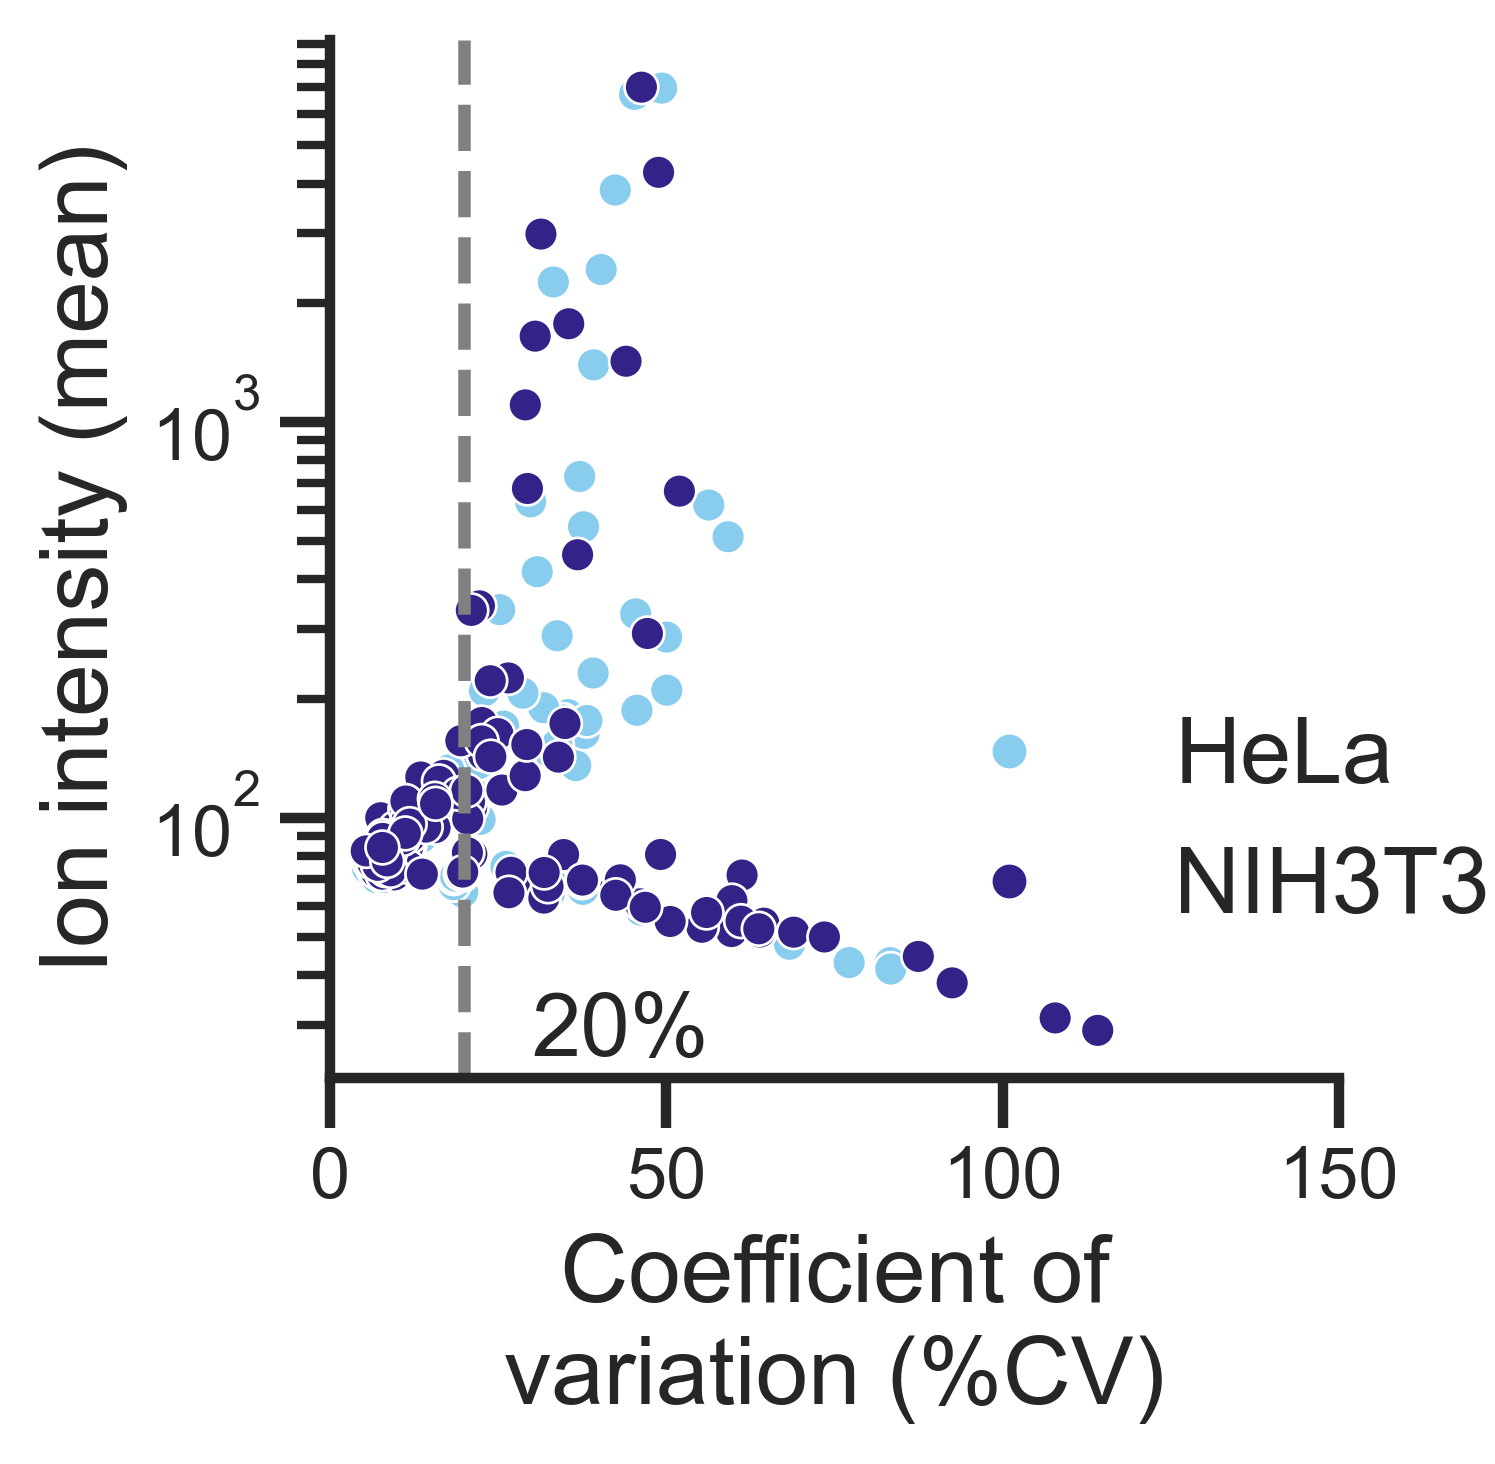

In [21]:
sns.set_style('ticks',)
ax = sns.relplot(data=CV_mean, 
                 x='CV',
                 y='mean',
                 hue='condition',
                 height=4,
                 aspect=1,
                 kind='scatter',
                 palette=palette,
                 s=37,
                 legend = True)

ax.set_xlabels('Coefficient of\nvariation (%CV)', fontsize=17)
ax.set_ylabels(label=u'Ion intensity (mean)', fontsize=17)
ax.set_titles(col_template='')
ax.set(xticks=(0,50,100,150))
ax._legend.set_bbox_to_anchor([0.7,0.4])
ax._legend.set_title(None)
plt.yscale('log')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

ax.refline(x=20)
for ax in plt.gcf().axes:
    ax.text(30,25,'20%', fontsize=16)

plt.savefig(plots_path / 'panel_D_mean.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_D_mean.svg', bbox_inches='tight')

#### Median ion intensity - non-normalized

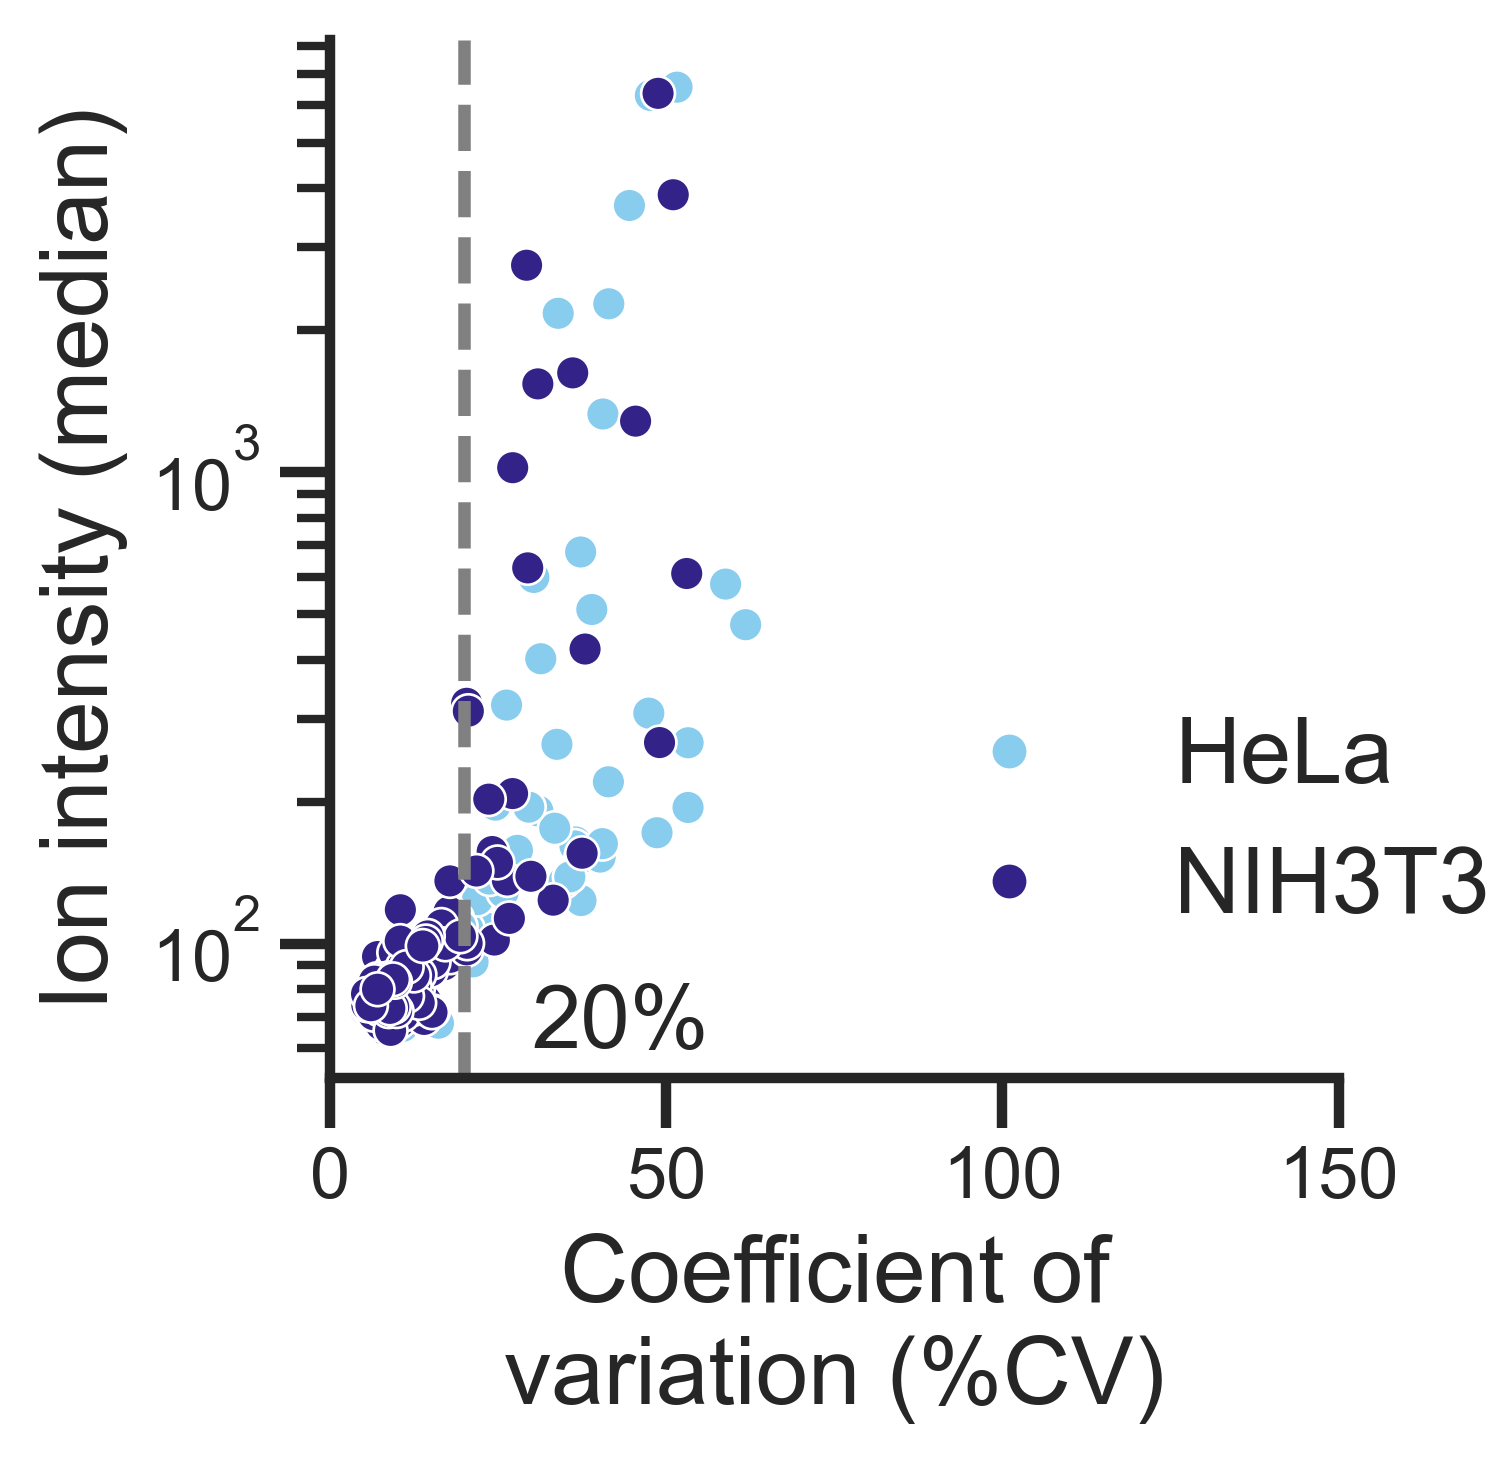

In [22]:
sns.set_style('ticks',)
ax = sns.relplot(data=CV_median, 
                 x='CV',
                 y='mean',
                 hue='condition',
                 height=4,
                 aspect=1,
                 kind='scatter',
                 palette=palette,
                 s=37,
                 legend=True)

ax.set_xlabels('Coefficient of\nvariation (%CV)', fontsize=17)
ax.set_ylabels(label=u'Ion intensity (median)', fontsize=17)
ax.set_titles(col_template='')
ax.set(xticks=(0,50,100,150))
ax._legend.set_bbox_to_anchor([0.7,0.4])
ax._legend.set_title(None)
plt.yscale('log')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

ax.refline(x=20)
for ax in plt.gcf().axes:
    ax.text(30,60,'20%', fontsize=16)

plt.savefig(plots_path / 'panel_D_median.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_D_median.svg', bbox_inches='tight')

#### 90% ion intensity - non-normalized 

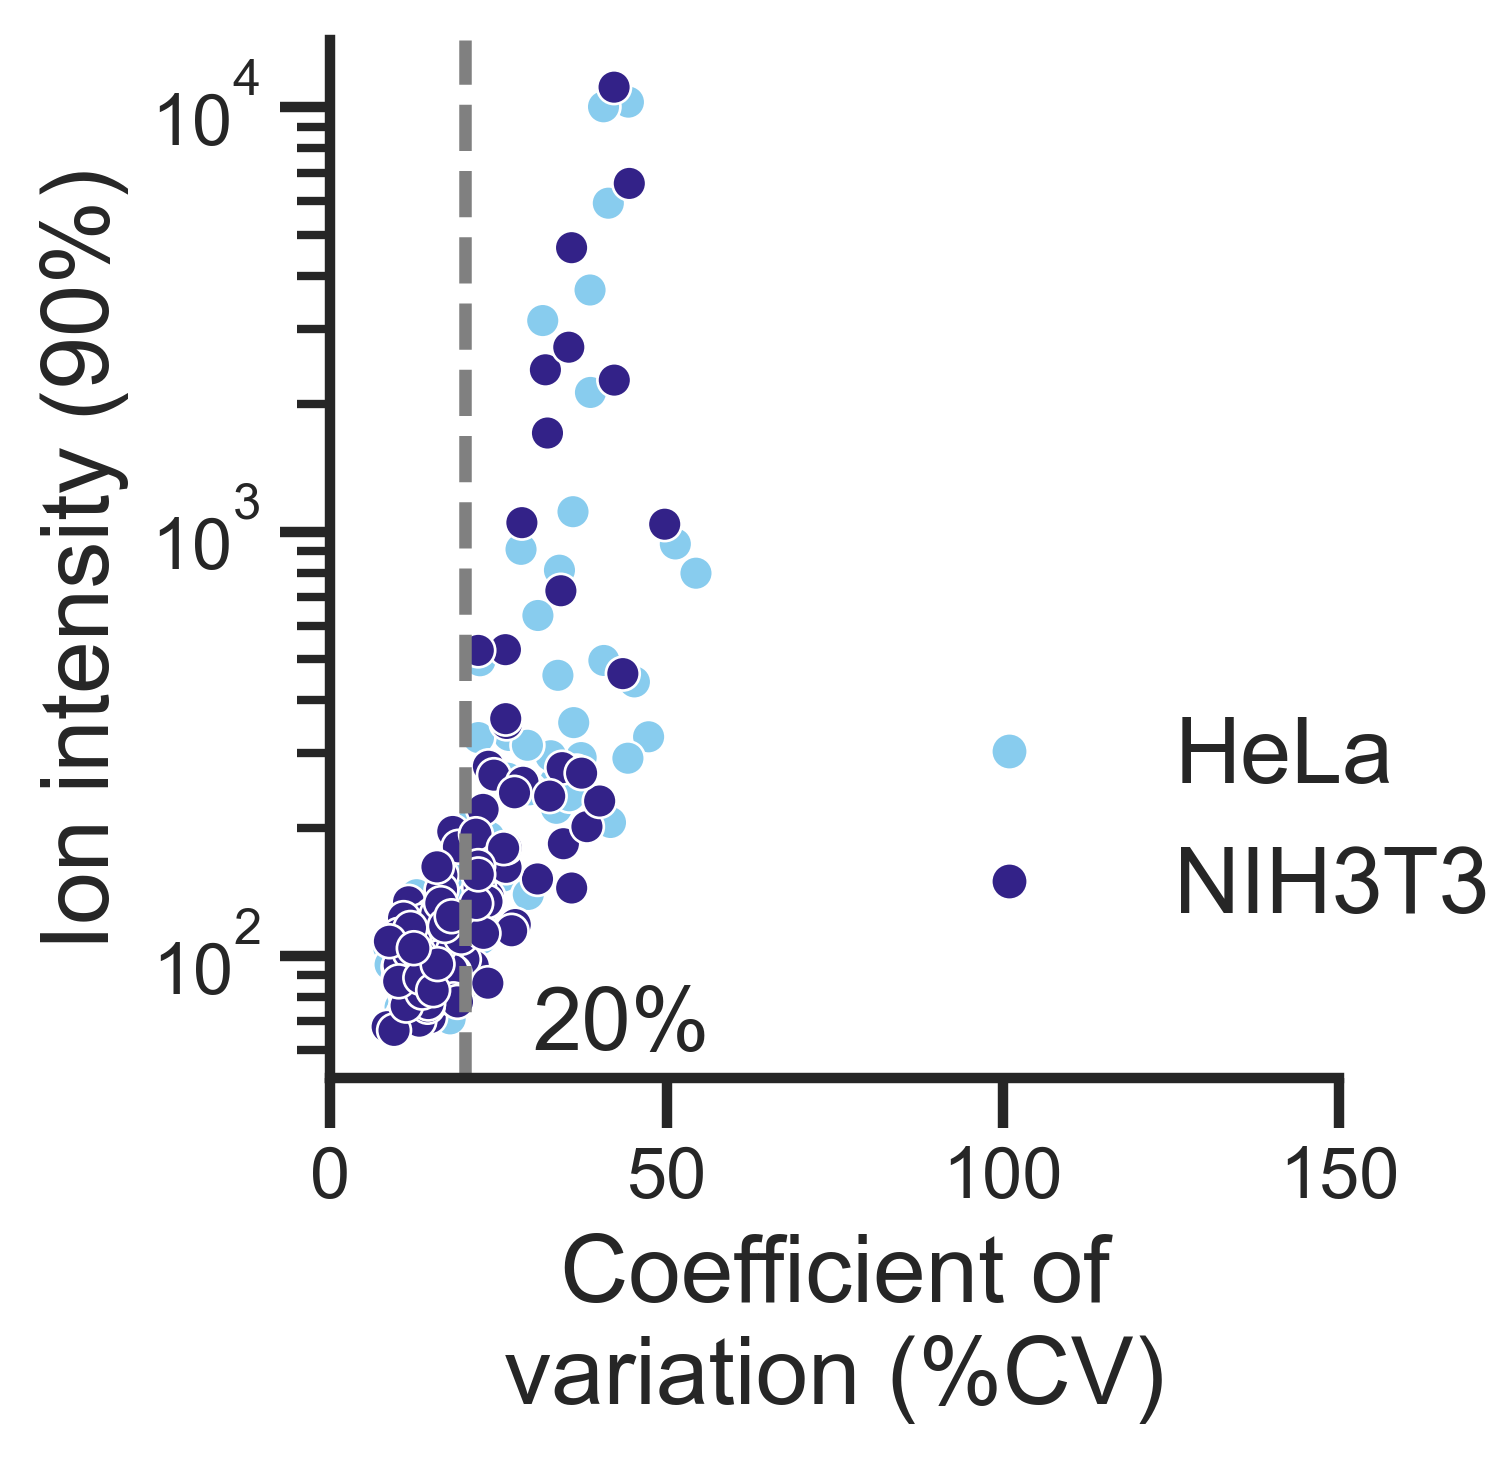

In [23]:
sns.set_style('ticks',)
ax = sns.relplot(data=CV_90, 
                 x='CV',
                 y='mean',
                 hue='condition',
                 height=4,
                 aspect=1,
                 kind='scatter',
                 palette=palette,
                 s=37,
                 legend=True)

ax.set_xlabels('Coefficient of\nvariation (%CV)', fontsize=17)
ax.set_ylabels(label=u'Ion intensity (90%)', fontsize=17)
ax._legend.set_bbox_to_anchor([0.7,0.4])
ax._legend.set_title(None)
ax.set_titles(col_template='')
ax.set(xticks=(0,50,100,150))
plt.yscale('log')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

ax.refline(x=20)
for ax in plt.gcf().axes:
    ax.text(30,60,'20%', fontsize=16)

plt.savefig(plots_path / 'panel_D_90.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_D_90.svg', bbox_inches='tight')

## Panel E

### Set paths

In [24]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC1_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_2'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [25]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [26]:
#select a column from adata that contains replicate and cell line information
refcol = 'slide_condition_rep'

#compute mean ion intensity for every replicate
mean_intra = utils.calculate_mean_intrareplicate(adata, refcol, nonzero=True)

#compute Coefficient of Variation for each ion across replicates
key = ['condition','ion','slide']
CV_metric = utils.calculate_CV(mean_replicate=mean_intra, key=key, column=refcol)

### Scatterplots

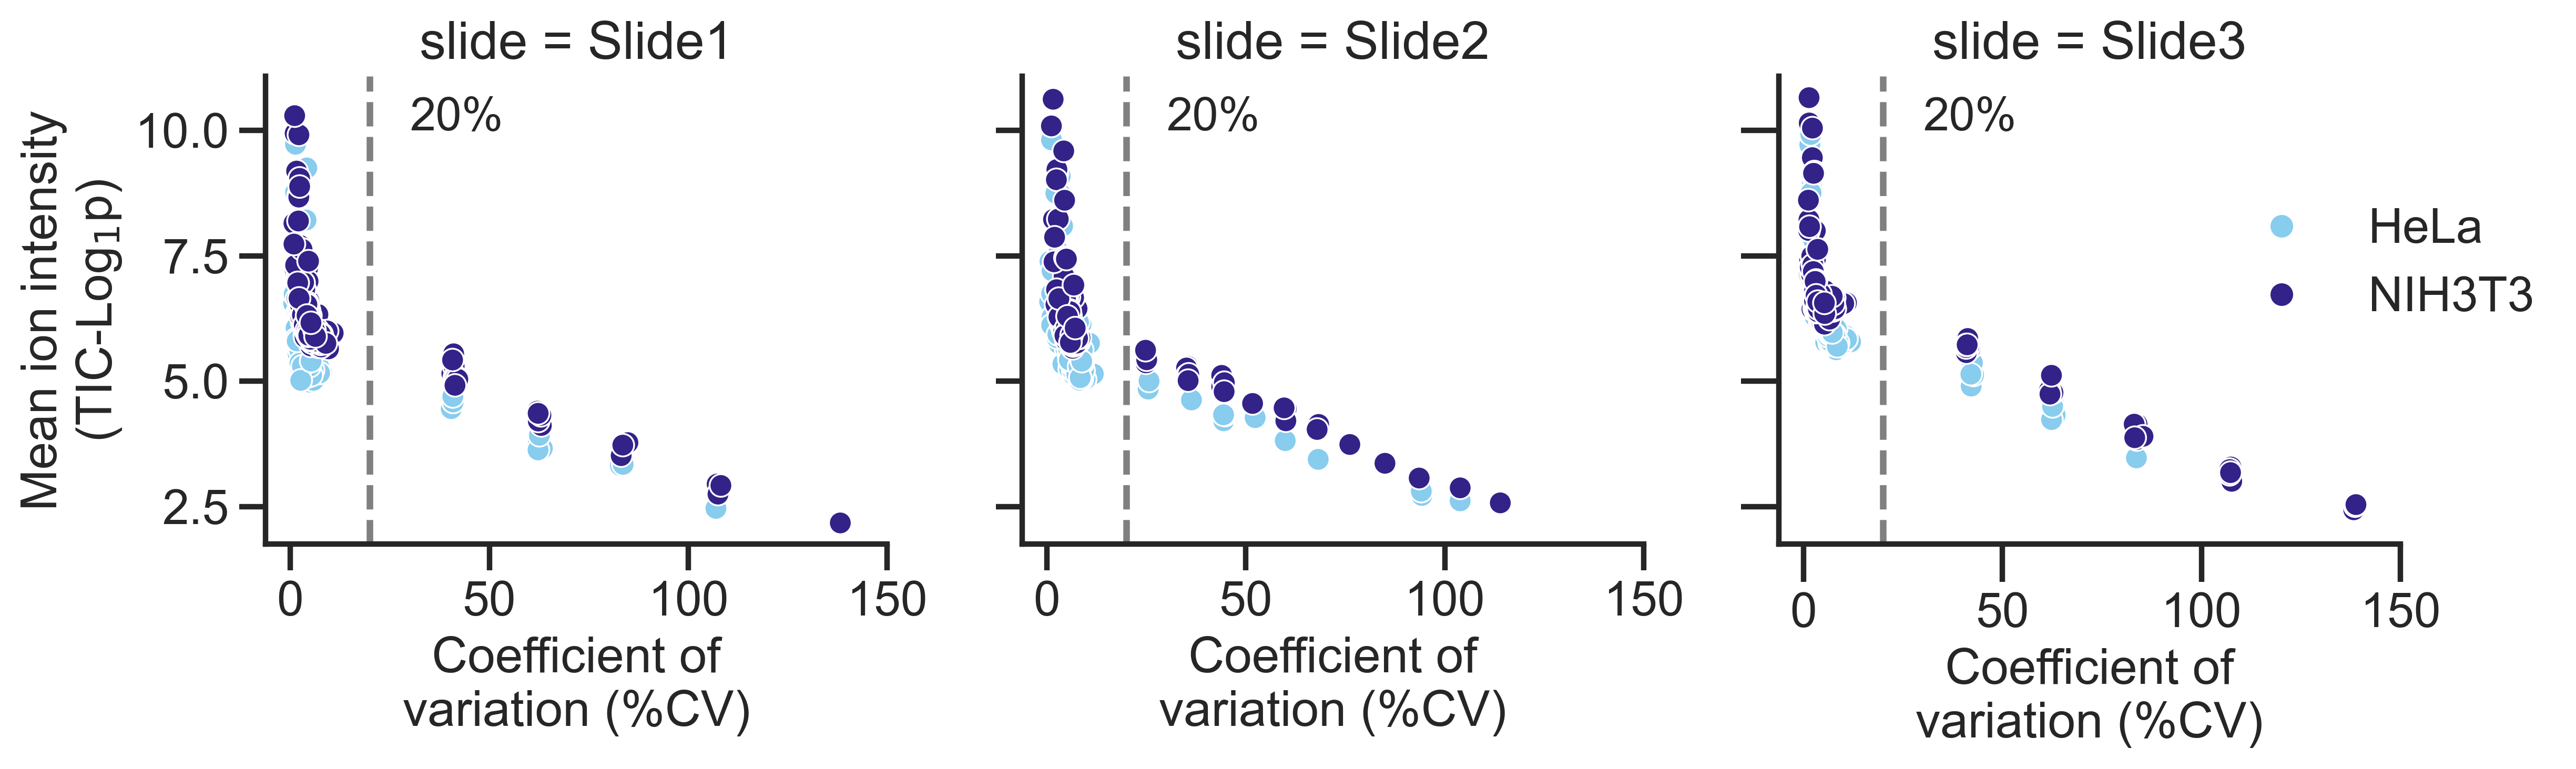

In [27]:
sns.set_style('ticks',)
ax = sns.relplot(data=CV_metric, 
                 x='CV',
                 y='mean',
                 hue='condition',
                 col='slide',
                 kind='scatter',
                 col_wrap=3,
                 height=4,
                 aspect=1,
                 palette=palette,
                 legend=True,
                 s=60)

ax.set_xlabels('Coefficient of\nvariation (%CV)', fontsize=17)
ax.set_ylabels(label= u'Mean ion intensity\n(TIC-Log$_1$p)', fontsize=17)
ax._legend.set_bbox_to_anchor([0.9,0.6])
ax._legend.set_title(None)

for ticks in ax.axes.flat:
    xticks = ticks.get_xticks()  # Get the current x-axis ticks
    removed_tick = -50 
    xticks = [tick for tick in xticks if tick != removed_tick] #remove specific tick
    ticks.set_xticks(xticks) # Set the new xticks
    
for ticks in ax.axes.flat:
    ax.set_xticklabels([0,50,100,150])
plt.tick_params(axis='both', size =13)

ax.refline(x=20)
for ax in plt.gcf().axes:
    ax.text(30,10,'20%', fontsize=16)

plt.savefig(plots_path / 'panel_E.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_E.svg', bbox_inches='tight')